<a href="https://colab.research.google.com/github/Park-kxng/titanic_survivor_prediction/blob/main/%ED%83%80%EC%9D%B4%ED%83%80%EB%8B%89_%EC%83%9D%EC%A1%B4%EC%9E%90_%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project name - 타이타닉 생존자 예측
- 타이타닉 생존자 예측은 Kaggle의 대표적인 문제 중의 하나이다.
- 데이터 출처 : https://www.kaggle.com/competitions/titanic/overview
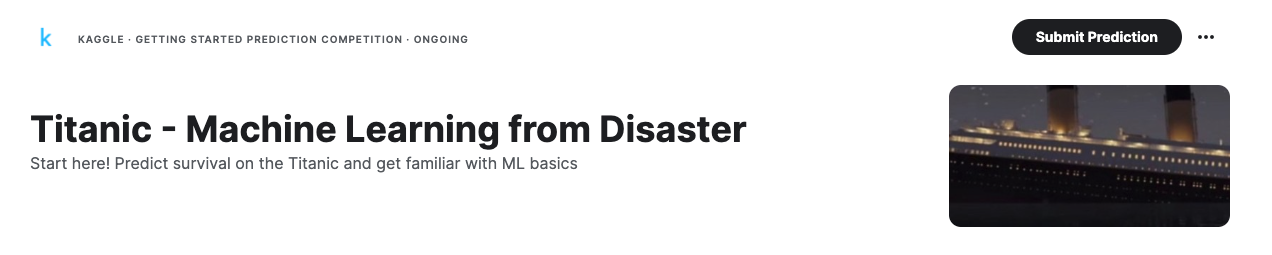

In [25]:
# 패키지 임포트하기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# 0) 데이터 가져오기

In [26]:
# 데이터 불러오기
df_gender_submission = pd.read_csv("/content/drive/MyDrive/포트폴리오/input/titanic/gender_submission.csv")
df_test = pd.read_csv("/content/drive/MyDrive/포트폴리오/input/titanic/test.csv")
df_train = pd.read_csv("/content/drive/MyDrive/포트폴리오/input/titanic/train.csv")
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [27]:
# 칼럼 속성 확인하기
print("칼럼 속성 확인하기")
df_train.info()

칼럼 속성 확인하기
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


- 결측치가 있다는 것을 파악
- name ,sex, ticket, cabin, embarked - object

In [28]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# 1) 데이터 전처리 - 결측치, 레이블 인코딩, 카테고리화

In [29]:
# 결측치 제거
# Age - 평균값으로 대체
df_train['Age'].fillna(df_train['Age'].mean(), inplace = True)
# Cabin - N으로 대체
df_train['Cabin'].fillna('N', inplace = True)
# Embarked - N으로 대체
df_train['Embarked'].fillna('N', inplace = True)ㅋㅋㅋㅋㅋㅋㅋ
list_col = ['Age', 'Cabin', 'Embarked']
for col in list_col:
  print( col+' null data count :', df_train[col].isnull().sum())

Age null data count : 0
Cabin null data count : 0
Embarked null data count : 0


In [31]:
df_train['Name'].value_counts()

Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: Name, Length: 891, dtype: int64

In [32]:
# 1) name - 데이터 전처리
# mr, mrs, miss, Dr, Rev, Col 이 포함된 경우 -> 이름 제외한 후 카테고리화
# name 열은 삭제합니다.
def transform_status(x):
    if "Mrs" in x or "Ms" in x:
        return "Mrs"
    elif "Mr" in x:
        return "Mr"
    elif "Miss" in x:
        return "Miss"
    elif "Master" in x:
        return "Master"
    elif "Dr" in x:
        return "Dr"
    elif "Rev" in x:
        return "Rev"
    elif "Col" in x:
        return "Col"
    else:
        return "0"

df_train["social_status"] = df_train["Name"].map(lambda x : transform_status(x))

# name 열은 삭제합니다.
del df_train['Name']

In [33]:
# 2) Sex - 전처리 (male : 0 / female :1)
df_train['Sex'] = df_train['Sex'].replace({"male" : 0, "female" : 1 })
df_train['Sex']

# 전처리가 잘 된 것을 확인할 수 있음

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    1
889    0
890    0
Name: Sex, Length: 891, dtype: int64

In [34]:
# 3) Ticket - 티켓번호는 랜덤이므로 상관없을 것이라 예상하여 삭제합니다.
del df_train['Ticket']

In [40]:
# 4) Carbin (선실 번호) - 맨 앞 글자만 추출하여 대체합니다.
df_train['Cabin'] = df_train['Cabin'].str[:1] # str : 글자 추출 메소드
df_train['Cabin']

0      N
1      C
2      N
3      C
4      N
      ..
886    N
887    B
888    N
889    C
890    N
Name: Cabin, Length: 891, dtype: object

**변수 정의**
- survival 생존 0 = 아니오, 1 = 예
- pclass 티켓 등급 (1 = 1등석, 2 = 2등석, 3 = 3등석)
- sex 성별
- Age 나이 (세)
- sibsp 타이타닉호에 탑승한 형제자매/배우자의 수
- parch 타이타닉호에 탑승한 부모/자녀의 수
- ticket 티켓 번호
- fare 승객 운임(요금)
- cabin 선실 번호
- embarked 탑승 항구 (C = 쉐부르, Q = 퀸스타운, S = 사우스햄톤)

변수 참고 사항
- pclass: 사회경제적 지위(Socio-Economic Status, SES)의 대리자
1st = 상류층
2nd = 중산층
3rd = 하류층
- age: 나이가 1보다 작으면 소수점 형태로 표시됩니다. 만약 나이가 추정되었다면 xx.5 형식으로 표시됩니다.
- sibsp: 이 데이터셋은 가족 관계를 다음과 같이 정의합니다...
Sibling = 형제, 자매, 이복형제, 이복자매
Spouse = 남편, 아내 (연인 및 약혼자는 무시됨)
parch: 이 데이터셋은 가족 관계를 다음과 같이 정의합니다...
Parent = 어머니, 아버지
Child = 딸, 아들, 이복딸, 이복아들
일부 어린이는 유모와 함께만 여행했으므로 그들의 경우 parch=0으로 표시됩니다.

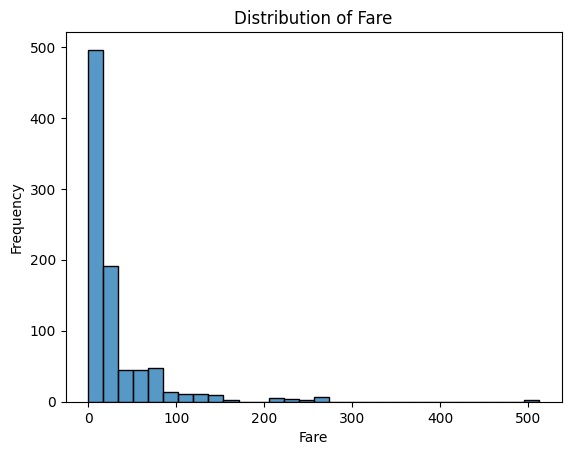

In [50]:
# 5) Fare - 그래프 그려서 카테고리화 고민해보기
import seaborn as sns
import matplotlib.pyplot as plt

# df_train은 데이터프레임의 이름이라고 가정합니다.
sns.histplot(data=df_train, x="Fare", bins=30)  # 히스토그램을 30개의 구간으로 나누어 그립니다.

# 그래프 제목과 축 이름 설정
plt.title('Distribution of Fare')
plt.xlabel('Fare')
plt.ylabel('Frequency')

# 그래프 보여주기
plt.show()

# 그래프를 봤을 때 카테고리화 시키기는 어려워보입니다.
del df_train['Fare']

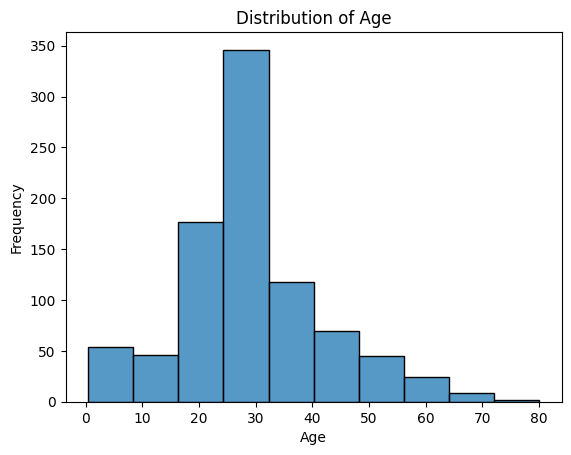

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Cabin,Embarked,social_status,Age_cat
0,1,0,3,0,1,0,N,S,Mr,Student
1,2,1,1,1,1,0,C,C,Mrs,Adult
2,3,1,3,1,0,0,N,S,Miss,Young Child
3,4,1,1,1,1,0,C,S,Mrs,Young Child
4,5,0,3,0,0,0,N,S,Mr,Young Child
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,0,0,N,S,Rev,Young Child
887,888,1,1,1,0,0,B,S,Miss,Student
888,889,0,3,1,1,2,N,S,Miss,Young Child
889,890,1,1,0,0,0,C,C,Mr,Young Child


In [55]:
# 6) Age - 연속형 변수를 카테고리화 합니다.
sns.histplot(data=df_train, x="Age", bins=10)  # 히스토그램을 30개의 구간으로 나누어 그립니다.

# 그래프 제목과 축 이름 설정
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

# 그래프 보여주기
plt.show()

# df_train.describe()을 봤을 때 age의 Min과 max가 0에서 80입니다.
# 아기부터 노인까지 직접 나이를 설정하여 카테고리화합니다.
# 카테고리값 할당을 위한 함수
def get_category(age) :
    cat = ''
    if age <= -1 : cat = 'Unknown'
    elif age <= 5 : cat = 'Baby'
    elif age <= 12 : cat = 'Child'
    elif age <= 18 : cat = 'Teenager'
    elif age <= 25 : cat = 'Student'
    elif age <= 35 : cat = 'Young Child'
    elif age <= 60 : cat = 'Adult'
    else : cat = 'Elderly'

    return cat

df_train['Age_cat'] = df_train['Age'].apply(lambda x : get_category(x))
# 원래 있던 'Age'열은 삭제합니다.
del df_train['Age']
df_train # 카테고리화를 완료한 데이터를 확인해봅시다.

In [56]:
df_train.info()
# 아직 Cabin, Embarked, soscial_status, Age_cat의 Dtype이 object로 나타납니다.
# 레이블 인코딩 패키지를 이용하여 숫자로 바꿔볼까요?

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   PassengerId    891 non-null    int64 
 1   Survived       891 non-null    int64 
 2   Pclass         891 non-null    int64 
 3   Sex            891 non-null    int64 
 4   SibSp          891 non-null    int64 
 5   Parch          891 non-null    int64 
 6   Cabin          891 non-null    object
 7   Embarked       891 non-null    object
 8   social_status  891 non-null    object
 9   Age_cat        891 non-null    object
dtypes: int64(6), object(4)
memory usage: 69.7+ KB


In [57]:
from sklearn import preprocessing

list_col = ['Cabin','Embarked','social_status','Age_cat']
for col in list_col :
        le = preprocessing.LabelEncoder()
        le.fit(df_train[col])
        df_train[col] = le.transform(df_train[col])
        label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))  # 원래 값과 인코딩된 값을 매핑한 딕셔너리 생성
        print(f"Label Mapping for '{col}': {label_mapping}")

Label Mapping for 'Cabin': {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'N': 7, 'T': 8}
Label Mapping for 'Embarked': {'C': 0, 'N': 1, 'Q': 2, 'S': 3}
Label Mapping for 'social_status': {'0': 0, 'Col': 1, 'Dr': 2, 'Master': 3, 'Miss': 4, 'Mr': 5, 'Mrs': 6, 'Rev': 7}
Label Mapping for 'Age_cat': {'Adult': 0, 'Baby': 1, 'Child': 2, 'Elderly': 3, 'Student': 4, 'Teenager': 5, 'Young Child': 6}


In [59]:
df_train.info()
# 모든 열의 dtype이 int인 것을 확인할 수 있습니다. 이제 모델 시각화를 시작해볼까요?

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   PassengerId    891 non-null    int64
 1   Survived       891 non-null    int64
 2   Pclass         891 non-null    int64
 3   Sex            891 non-null    int64
 4   SibSp          891 non-null    int64
 5   Parch          891 non-null    int64
 6   Cabin          891 non-null    int64
 7   Embarked       891 non-null    int64
 8   social_status  891 non-null    int64
 9   Age_cat        891 non-null    int64
dtypes: int64(10)
memory usage: 69.7 KB


# 2) 데이터 시각화 - 바그래프, 상관계수 시각화

변수 정의

- survival 생존 0 = 아니오, 1 = 예
- pclass 티켓 등급 (1 = 1등석, 2 = 2등석, 3 = 3등석)
- sex 성별 (male : 0 / female :1)
- Age 나이 (세) {'Adult': 0, 'Baby': 1, 'Child': 2, 'Elderly': 3, 'Student': 4, 'Teenager': 5, 'Young Child': 6}
- sibsp 타이타닉호에 탑승한 형제자매/배우자의 수
- parch 타이타닉호에 탑승한 부모/자녀의 수
- cabin 선실 번호 'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'N': 7, 'T': 8}
- embarked 탑승 항구 (C = 쉐부르, Q = 퀸스타운, S = 사우스햄톤)ㅍ

In [63]:
# 시각화를 하는데에 PassengerId는 필요없어보입니다. 그저 승객번호이기 때문입니다.
del df_train['PassengerId']
df_train


,Survived,Pclass,Sex,SibSp,Parch,Cabin,Embarked,social_status,Age_cat
0,0,3,0,1,0,7,3,5,4
1,1,1,1,1,0,2,0,6,0
2,1,3,1,0,0,7,3,4,6
3,1,1,1,1,0,2,3,6,6
4,0,3,0,0,0,7,3,5,6
...,...,...,...,...,...,...,...,...,...
886,0,2,0,0,0,7,3,7,6
887,1,1,1,0,0,1,3,4,4
888,0,3,1,1,2,7,3,4,6
889,1,1,0,0,0,2,0,5,6


<Axes: xlabel='Sex', ylabel='Survived'>

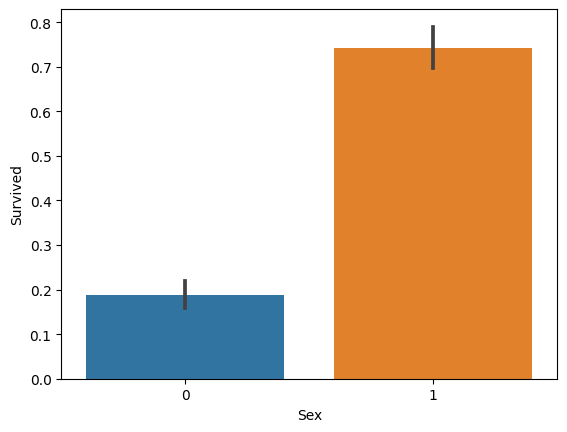

In [69]:
sns.barplot(x = 'Sex', y = 'Survived', data = df_train)
# 여성이 더 생존을 많이 한 것을 알 수 있습니다.

<Axes: xlabel='SibSp', ylabel='Survived'>

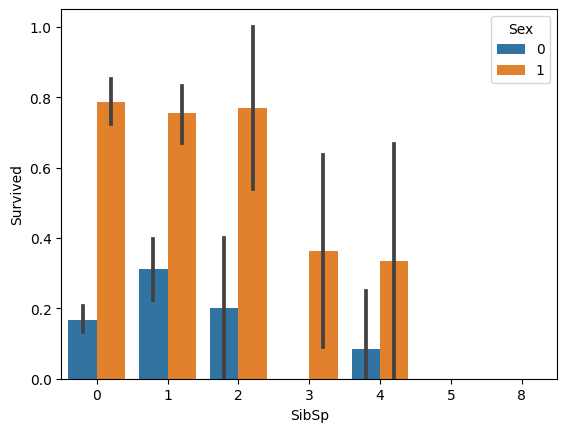

In [70]:
sns.barplot(x = 'SibSp', y = 'Survived', hue = 'Sex', data = df_train)

<Axes: xlabel='Parch', ylabel='Survived'>

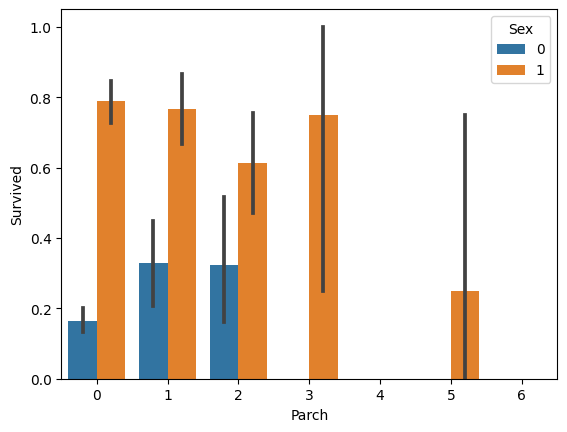

In [71]:
sns.barplot(x = 'Parch', y = 'Survived', hue = 'Sex', data = df_train)

<Axes: xlabel='Cabin', ylabel='Survived'>

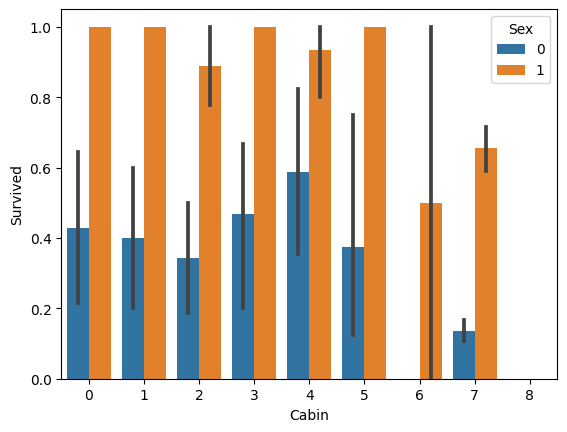

In [72]:
sns.barplot(x = 'Cabin', y = 'Survived', hue = 'Sex', data = df_train)

<Axes: xlabel='Embarked', ylabel='Survived'>

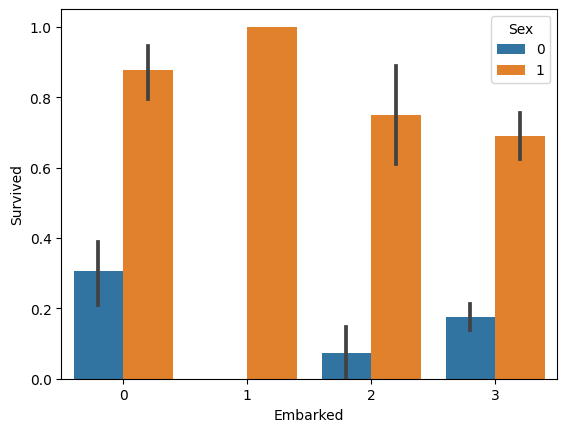

In [73]:
sns.barplot(x = 'Embarked', y = 'Survived', hue = 'Sex', data = df_train)

<Axes: xlabel='social_status', ylabel='Survived'>

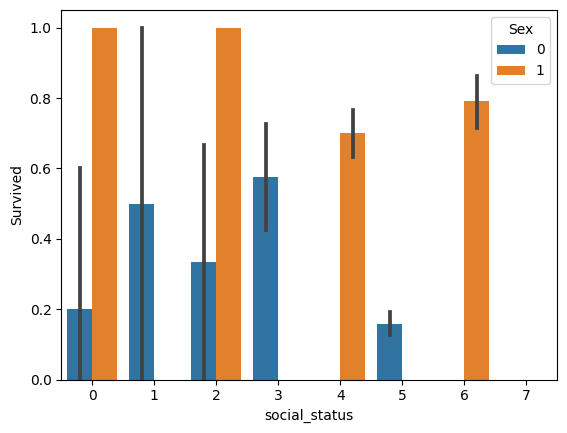

In [74]:
sns.barplot(x = 'social_status', y = 'Survived', hue = 'Sex', data = df_train)

<Axes: xlabel='Age_cat', ylabel='Survived'>

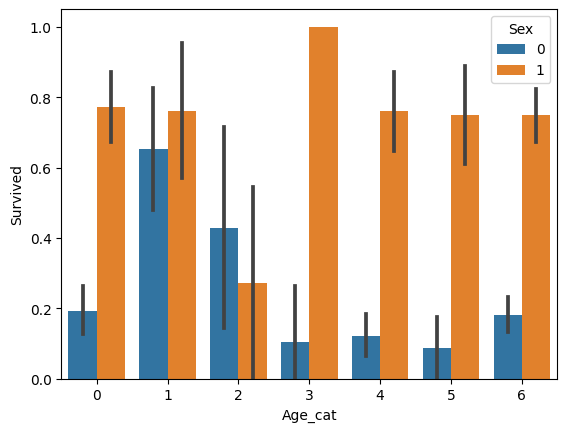

In [75]:
sns.barplot(x = 'Age_cat', y = 'Survived', hue = 'Sex', data = df_train)

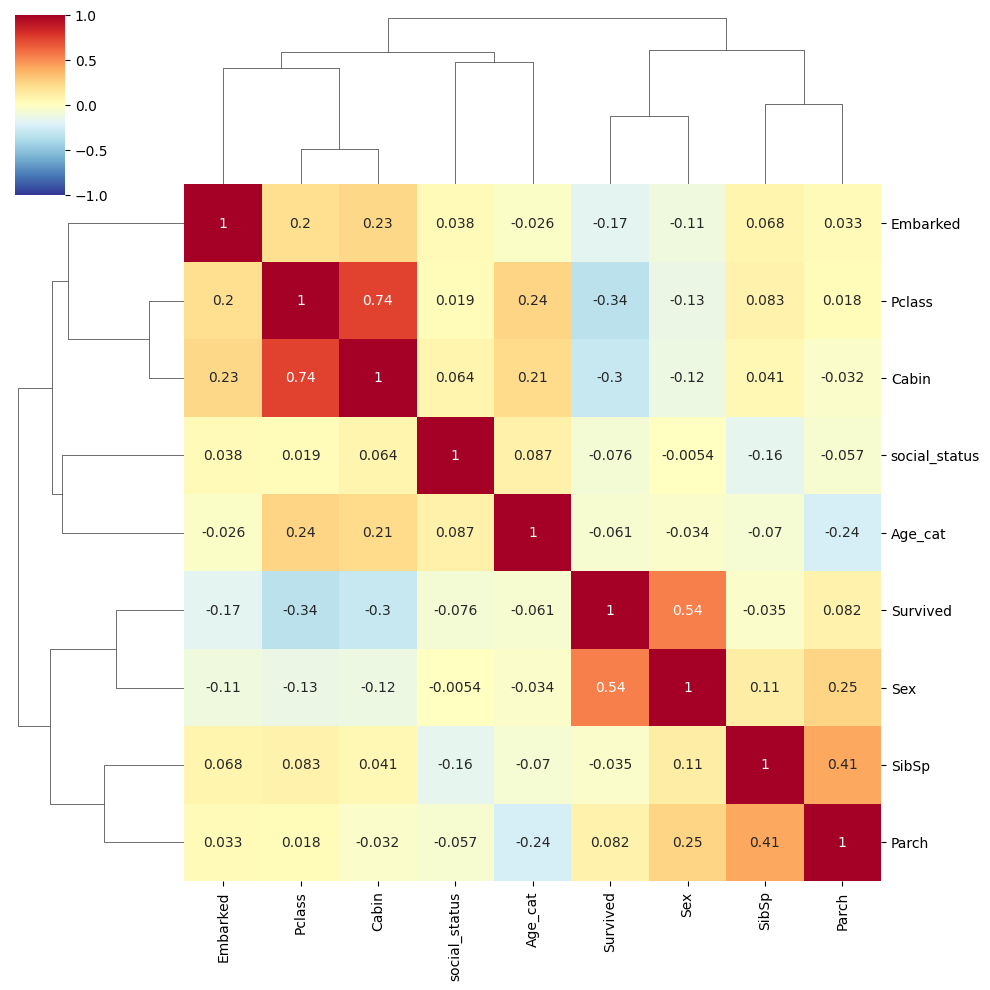

In [78]:
# 상관계수를 시각화해봅시다.
sns.clustermap(df_train.corr(),
               annot = True,      # 실제 값 화면에 나타내기
               cmap = 'RdYlBu_r',  # Red, Yellow, Blue 색상으로 표시
               vmin = -1, vmax = 1, #컬러차트 -1 ~ 1 범위로 표시
              )
# 빨갛수록 더 상관이 많은 것입니다. SibSp<Parch<Sex순으로 빨간 편에 속합니다.

# 3) 모델 학습 및 평가 - 결정트리, 랜덤포레스트, 로지스틱 회귀

In [80]:
# 데이터를 3:7로 나누어봅시다.
from sklearn.model_selection import train_test_split

y_titanic_df = df_train['Survived']
X_titanic_df = df_train.drop('Survived', axis = 1, inplace = False)
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size = 0.3, random_state = 11)


In [81]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 각 모델에 대한 Classifier 클래스 생성
dt_clf = DecisionTreeClassifier(random_state = 11)
rf_clf = RandomForestClassifier(random_state = 11)
lr_clf = LogisticRegression(random_state = 11)

# DecisionTreeClassfier 학습/예측평가
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
print('DecisionTreeClassifier 정확도 : {0:.4f}'.format(accuracy_score(y_test, dt_pred)))

# RandomForestClassifier 학습/예측/평가
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print('RandomForestClassifier 정확도 : {0:.4f}'.format(accuracy_score(y_test, rf_pred)))

# LogisticRegression 학습/예측/평가
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
print('LogisticRegression 정확도 : {0:.4f}'.format(accuracy_score(y_test, lr_pred)))

#0.8이상의 정확도가 나온 것을 알 수 있습니다. 그 중에서도 랜덤포레스트가 가장 높게 나타납니다.

DecisionTreeClassifier 정확도 : 0.8022
RandomForestClassifier 정확도 : 0.8321
LogisticRegression 정확도 : 0.8284


In [82]:
# 교차검증을 통해 결정트리 모델을 평가해볼까요?
from sklearn.model_selection import KFold

def exec_kfold(clf, folds = 5) :
    # 폴드 세트가 5개인 KFold 객체 생성. 폴드 수만큼 예측결과 저장 위한 리스트 생성
    kfold = KFold(n_splits = folds)
    scores = []

    # KFold 교차 검증 수행
    for iter_count, (train_index, test_index) in enumerate(kfold.split(X_titanic_df)) :
        # X_titanic_df 데이터에서 교차 검증별로 학습과 검증 데이터를 가리키는 index 생성
        X_train, X_test = X_titanic_df.values[train_index], X_titanic_df.values[test_index] # values를 통해 df를 ndarray로 변환
        y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]

        # Classifier 학습/예측/평가
        clf.fit(X_train, y_train)
        clf_pred = clf.predict(X_test)
        accuracy = accuracy_score(y_test, clf_pred)
        scores.append(accuracy)
        print("교차 검증 {0} 정확도 : {1:.4f}".format(iter_count+1, accuracy))

    # 5개의 fold에서 평균 계산
    mean_score = np.mean(scores)
    print("평균 정확도: {0:.4f}".format(mean_score))

#exec_fold 호출
exec_kfold(dt_clf, folds = 5)

교차 검증 1 정확도 : 0.7542
교차 검증 2 정확도 : 0.7697
교차 검증 3 정확도 : 0.7978
교차 검증 4 정확도 : 0.7584
교차 검증 5 정확도 : 0.8090
평균 정확도: 0.7778


In [84]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf, X_titanic_df, y_titanic_df, cv = 5)
print("scores : ", scores)
for iter_count, accuracy in enumerate(scores) :
    print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count+1, accuracy))

print("평균 정확도: {0:.4f}".format(np.mean(scores)))

scores :  [0.75418994 0.78089888 0.79213483 0.75842697 0.80898876]
교차 검증 1 정확도: 0.7542
교차 검증 2 정확도: 0.7809
교차 검증 3 정확도: 0.7921
교차 검증 4 정확도: 0.7584
교차 검증 5 정확도: 0.8090
평균 정확도: 0.7789


왜 KFold를 이용했을 때의 accuracy와 cross_val_score를 이용했을 때의 accuracy가 다를까요?

정답은, 모델이 Classifier이기에 cross_val_score은 KFold가 아닌 Statified KFold를 수행하기 때문입니다.

In [85]:
#GridSearhCV을 이용하여 최적의 하라미터값을 구해볼까요?
# 결정트리
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':[2, 3, 5, 10],
             'min_samples_split':[2, 3, 5],
             'min_samples_leaf':[1, 5, 8]}
grid_dclf = GridSearchCV(dt_clf, param_grid = parameters, scoring = 'accuracy', cv = 5)
grid_dclf.fit(X_train, y_train)

print('GridSearchCV 최적 하이퍼 파라미터 : ', grid_dclf.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_

#GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행
dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test, dpredictions)
print('테스트 세트에서의 DecisionTreeClassifier 정확도 : {0:.4f}'.format(accuracy))

# 최적의 하이퍼 파라미터로 학습시키니 정확도가 0.8172까지 올라온 것을 확인할 수 있습니다.

GridSearchCV 최적 하이퍼 파라미터 :  {'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.8137
테스트 세트에서의 DecisionTreeClassifier 정확도 : 0.8172


In [88]:
parameters = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10],
    'min_samples_split': [2, 4]
}
grid_rclf = GridSearchCV(rf_clf, param_grid = parameters, scoring = 'accuracy', cv = 5)
grid_rclf.fit(X_train, y_train)

print('GridSearchCV 최적 하이퍼 파라미터 : ', grid_rclf.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_rclf.best_score_))
best_rclf = grid_rclf.best_estimator_

#GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행
dpredictions = best_rclf.predict(X_test)
accuracy = accuracy_score(y_test, dpredictions)
print('테스트 세트에서의 RandomForestClassifier 정확도 : {0:.4f}'.format(accuracy))

GridSearchCV 최적 하이퍼 파라미터 :  {'max_depth': 5, 'min_samples_split': 4, 'n_estimators': 100}
GridSearchCV 최고 정확도: 0.8154
테스트 세트에서의 RandomForestClassifier 정확도 : 0.8433


In [90]:
parameters = {'C': [0.1, 1, 10]}

grid_lclf = GridSearchCV(lr_clf, param_grid = parameters, scoring = 'accuracy', cv = 5)
grid_lclf.fit(X_train, y_train)

print('GridSearchCV 최적 하이퍼 파라미터 : ', grid_lclf.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_lclf.best_score_))
best_lclf = grid_lclf.best_estimator_

#GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행
dpredictions = best_lclf.predict(X_test)
accuracy = accuracy_score(y_test, dpredictions)
print('테스트 세트에서의 LogisticRegression 정확도 : {0:.4f}'.format(accuracy))

GridSearchCV 최적 하이퍼 파라미터 :  {'C': 10}
GridSearchCV 최고 정확도: 0.7688
테스트 세트에서의 LogisticRegression 정확도 : 0.8321


In [91]:
# 랜덤포레스트분류가 가장 정확도가 높게 나오는 것을 알 수 있습니다.
# 최적의 분류 모델을 저장합니다.
import joblib

# 위에서 최적의 랜덤 포레스트 분류기가 best_rclf 가정합니다.
best_rclf.fit(X_train, y_train)  # 최적의 모델을 다시 전체 훈련 데이터로 학습시킵니다.

# 모델 저장
joblib.dump(best_rclf, 'best_random_forest_model.pkl')

['best_random_forest_model.pkl']

# 4) 데이터 예측 : test.csv을 이용

In [ ]:
df_test

In [92]:
# 결측치 제거
# Age - 평균값으로 대체
df_test['Age'].fillna(df_test['Age'].mean(), inplace = True)
# Cabin - N으로 대체
df_test['Cabin'].fillna('N', inplace = True)
# Embarked - N으로 대체
df_test['Embarked'].fillna('N', inplace = True)
list_col = ['Age', 'Cabin', 'Embarked']
for col in list_col:
  print( col+' null data count :', df_test[col].isnull().sum())

Age null data count : 0
Cabin null data count : 0
Embarked null data count : 0


In [93]:
# 1) name - 데이터 전처리
# mr, mrs, miss, Dr, Rev, Col 이 포함된 경우 -> 이름 제외한 후 카테고리화
# name 열은 삭제합니다.

df_test["social_status"] = df_test["Name"].map(lambda x : transform_status(x))

# name 열은 삭제합니다.
del df_test['Name']

In [94]:
# 2) Sex - 전처리 (male : 0 / female :1)
df_test['Sex'] = df_test['Sex'].replace({"male" : 0, "female" : 1 })
df_test['Sex']

# 전처리가 잘 된 것을 확인할 수 있음

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Sex, Length: 418, dtype: int64

In [95]:
# 3) Ticket - 티켓번호는 랜덤이므로 상관없을 것이라 예상하여 삭제합니다.
del df_test['Ticket']

In [96]:
# 4) Carbin (선실 번호) - 맨 앞 글자만 추출하여 대체합니다.
df_test['Cabin'] = df_test['Cabin'].str[:1] # str : 글자 추출 메소드
df_test['Cabin']

0      N
1      N
2      N
3      N
4      N
      ..
413    N
414    C
415    N
416    N
417    N
Name: Cabin, Length: 418, dtype: object

In [97]:
# 5) Fare - 그래프 그려서 카테고리화 고민해보기
# 그래프를 봤을 때 카테고리화 시키기는 어려워보입니다.
del df_test['Fare']

In [98]:
# 6) Age - 연속형 변수를 카테고리화 합니다.

df_test['Age_cat'] = df_test['Age'].apply(lambda x : get_category(x))
# 원래 있던 'Age'열은 삭제합니다.
del df_test['Age']
df_test # 카테고리화를 완료한 데이터를 확인해봅시다.

,PassengerId,Pclass,Sex,SibSp,Parch,Cabin,Embarked,social_status,Age_cat
0,892,3,0,0,0,N,Q,Mr,Young Child
1,893,3,1,1,0,N,S,Mrs,Adult
2,894,2,0,0,0,N,Q,Mr,Elderly
3,895,3,0,0,0,N,S,Mr,Young Child
4,896,3,1,1,1,N,S,Mrs,Student
...,...,...,...,...,...,...,...,...,...
413,1305,3,0,0,0,N,S,Mr,Young Child
414,1306,1,1,0,0,C,C,0,Adult
415,1307,3,0,0,0,N,S,Mr,Adult
416,1308,3,0,0,0,N,S,Mr,Young Child


In [99]:
df_test.info()
# 아직 Cabin, Embarked, soscial_status, Age_cat의 Dtype이 object로 나타납니다.
# 레이블 인코딩 패키지를 이용하여 숫자로 바꿔볼까요?

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   PassengerId    418 non-null    int64 
 1   Pclass         418 non-null    int64 
 2   Sex            418 non-null    int64 
 3   SibSp          418 non-null    int64 
 4   Parch          418 non-null    int64 
 5   Cabin          418 non-null    object
 6   Embarked       418 non-null    object
 7   social_status  418 non-null    object
 8   Age_cat        418 non-null    object
dtypes: int64(5), object(4)
memory usage: 29.5+ KB


In [100]:
from sklearn import preprocessing

list_col = ['Cabin','Embarked','social_status','Age_cat']
for col in list_col :
        le = preprocessing.LabelEncoder()
        le.fit(df_test[col])
        df_test[col] = le.transform(df_test[col])
        label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))  # 원래 값과 인코딩된 값을 매핑한 딕셔너리 생성
        print(f"Label Mapping for '{col}': {label_mapping}")

Label Mapping for 'Cabin': {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'N': 7}
Label Mapping for 'Embarked': {'C': 0, 'Q': 1, 'S': 2}
Label Mapping for 'social_status': {'0': 0, 'Col': 1, 'Dr': 2, 'Master': 3, 'Miss': 4, 'Mr': 5, 'Mrs': 6, 'Rev': 7}
Label Mapping for 'Age_cat': {'Adult': 0, 'Baby': 1, 'Child': 2, 'Elderly': 3, 'Student': 4, 'Teenager': 5, 'Young Child': 6}


In [103]:
del df_test['PassengerId']
df_test


,Pclass,Sex,SibSp,Parch,Cabin,Embarked,social_status,Age_cat
0,3,0,0,0,7,1,5,6
1,3,1,1,0,7,2,6,0
2,2,0,0,0,7,1,5,3
3,3,0,0,0,7,2,5,6
4,3,1,1,1,7,2,6,4
...,...,...,...,...,...,...,...,...
413,3,0,0,0,7,2,5,6
414,1,1,0,0,2,0,0,0
415,3,0,0,0,7,2,5,0
416,3,0,0,0,7,2,5,6


In [104]:
loaded_model = joblib.load('best_random_forest_model.pkl')
predictions = loaded_model.predict(df_test)
print(predictions)

[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 1 1 0 0 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 1 0 1 0 1 1 0 1 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0
 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 1 0 0 0 1 1 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 1 1 0
 0 1 1 1 1 1 0 1 0 0 1]


Not Survived:261 , Survived :157


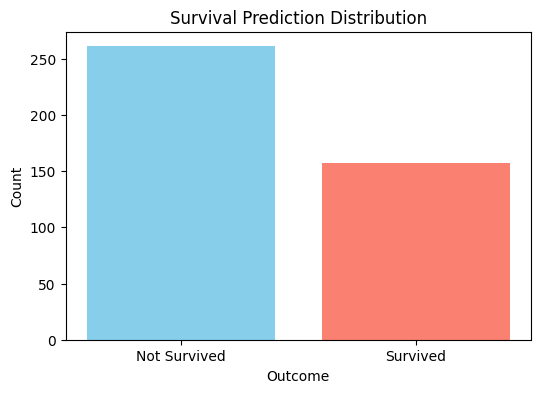

In [107]:
# 예측 결과의 분포를 시각화하는 막대 그래프
plt.figure(figsize=(6, 4))
survived_count = np.sum(predictions)  # 생존자 수
not_survived_count = len(predictions) - survived_count  # 사망자 수

plt.bar(['Not Survived', 'Survived'], [not_survived_count, survived_count], color=['skyblue', 'salmon'])
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.title('Survival Prediction Distribution')
print(f'Not Survived:{not_survived_count} , Survived :{survived_count}')
plt.show()